Problem Statement: Analyzing Sales Performance by Region in a Retail Company


In [10]:
import pandas as pd

1.Import the "Retail_Sales_Data.csv" dataset.

In [11]:
df = pd.read_csv(r"C:\Users\rv401\Desktop\DMV\6_Retail_Sales.csv")

2. Explore the dataset to understand its structure and content.

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       149 non-null    object 
 1   Product_category  149 non-null    object 
 2   quantity_sold     149 non-null    int64  
 3   Sales_Amount      149 non-null    float64
 4   transaction_date  149 non-null    object 
 5   Region            149 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.1+ KB
None


In [13]:
print(df)

    customer_id Product_category  quantity_sold  Sales_Amount  \
0       C241288         Clothing              5       1500.40   
1       C111565            Shoes              3       1800.51   
2       C266599         Clothing              1        300.08   
3       C988172            Shoes              5       3000.85   
4       C189076            Books              4         60.60   
..          ...              ...            ...           ...   
144     C309082  Food & Beverage              3         15.69   
145     C236365        Cosmetics              2         81.32   
146     C178734            Shoes              5       3000.85   
147     C223010         Clothing              4       1200.32   
148     C289933  Food & Beverage              2         10.46   

    transaction_date            Region  
0         05-08-2022            Kanyon  
1         12-12-2021    Forum Istanbul  
2         09-11-2021         Metrocity  
3         16-05-2021      Metropol AVM  
4         24-1

4. Group the sales data by region and calculate the total sales amount for each region.

In [14]:
sales_by_region = df.groupby('Region')['Sales_Amount'].sum().reset_index()
print(sales_by_region)

              Region  Sales_Amount
0        Cevahir AVM       5300.86
1  Emaar Square Mall       7320.50
2     Forum Istanbul       6836.64
3       Istinye Park       2162.35
4             Kanyon      33388.01
5   Mall of Istanbul      18636.46
6          Metrocity      13662.51
7       Metropol AVM      10751.48
8     Viaport Outlet       8267.10
9       Zorlu Center       6571.49


5. Create bar plots or pie charts to visualize the sales distribution by region.

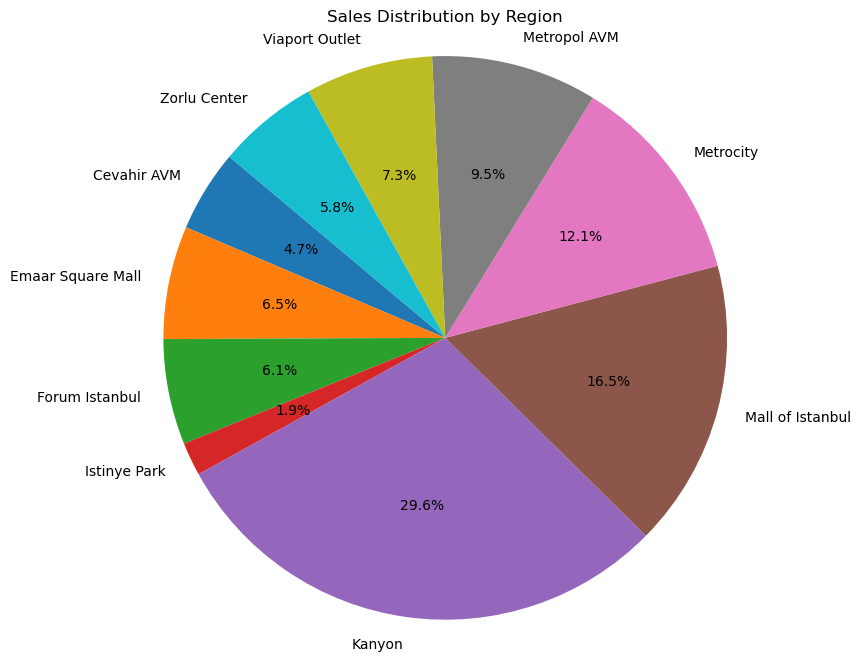

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales_Amount'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')  
plt.show()

6. Identify the top-performing regions based on the highest sales amount

In [16]:
top_performing_regions = sales_by_region.sort_values(by='Sales_Amount', ascending=False)

# Print the top-performing regions
print("Top-performing regions based on highest sales amount:")
print(top_performing_regions)

Top-performing regions based on highest sales amount:
              Region  Sales_Amount
4             Kanyon      33388.01
5   Mall of Istanbul      18636.46
6          Metrocity      13662.51
7       Metropol AVM      10751.48
8     Viaport Outlet       8267.10
1  Emaar Square Mall       7320.50
2     Forum Istanbul       6836.64
9       Zorlu Center       6571.49
0        Cevahir AVM       5300.86
3       Istinye Park       2162.35


7. Group the sales data by region and product category to calculate the total sales
amount for each combination

In [17]:
sales_by_region_category = df.groupby(['Region', 'Product_category'])['Sales_Amount'].sum().reset_index()

# Display the result
print(sales_by_region_category)

               Region Product_category  Sales_Amount
0         Cevahir AVM         Clothing       3300.88
1         Cevahir AVM  Food & Beverage         20.92
2         Cevahir AVM            Shoes       1800.51
3         Cevahir AVM         Souvenir         35.19
4         Cevahir AVM             Toys        143.36
5   Emaar Square Mall            Books         15.15
6   Emaar Square Mall         Clothing       1500.40
7   Emaar Square Mall        Cosmetics        203.30
8   Emaar Square Mall  Food & Beverage         20.92
9   Emaar Square Mall            Shoes       5401.53
10  Emaar Square Mall             Toys        179.20
11     Forum Istanbul            Books         75.75
12     Forum Istanbul         Clothing       1800.48
13     Forum Istanbul  Food & Beverage         15.69
14     Forum Istanbul            Shoes       4801.36
15     Forum Istanbul             Toys        143.36
16       Istinye Park            Books         45.45
17       Istinye Park         Clothing       1

8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
different regions and product categories

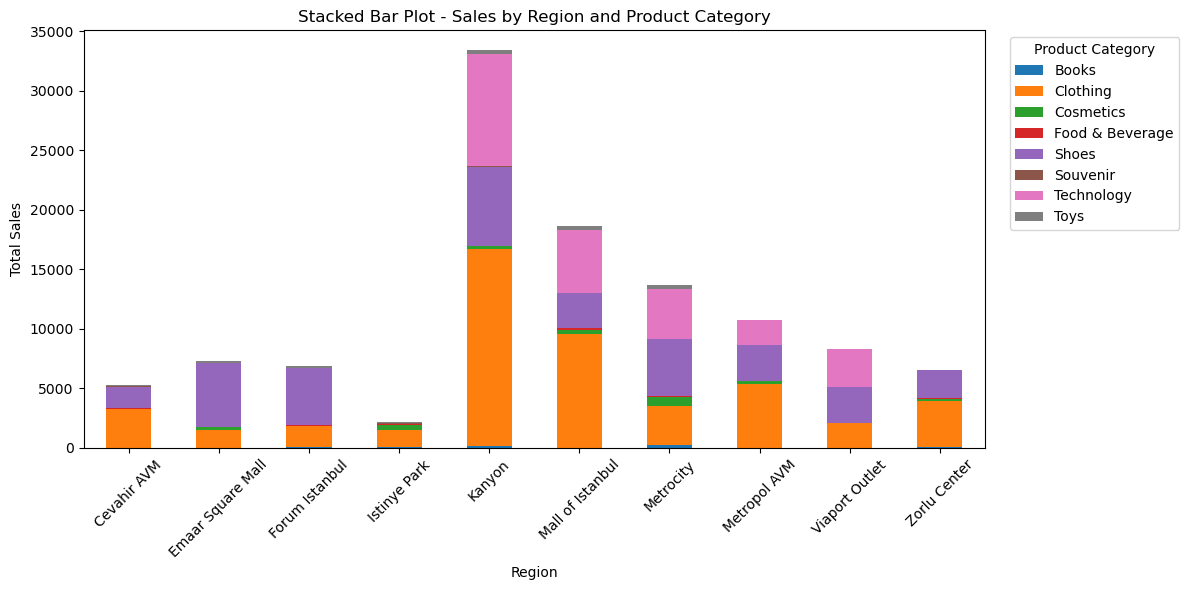

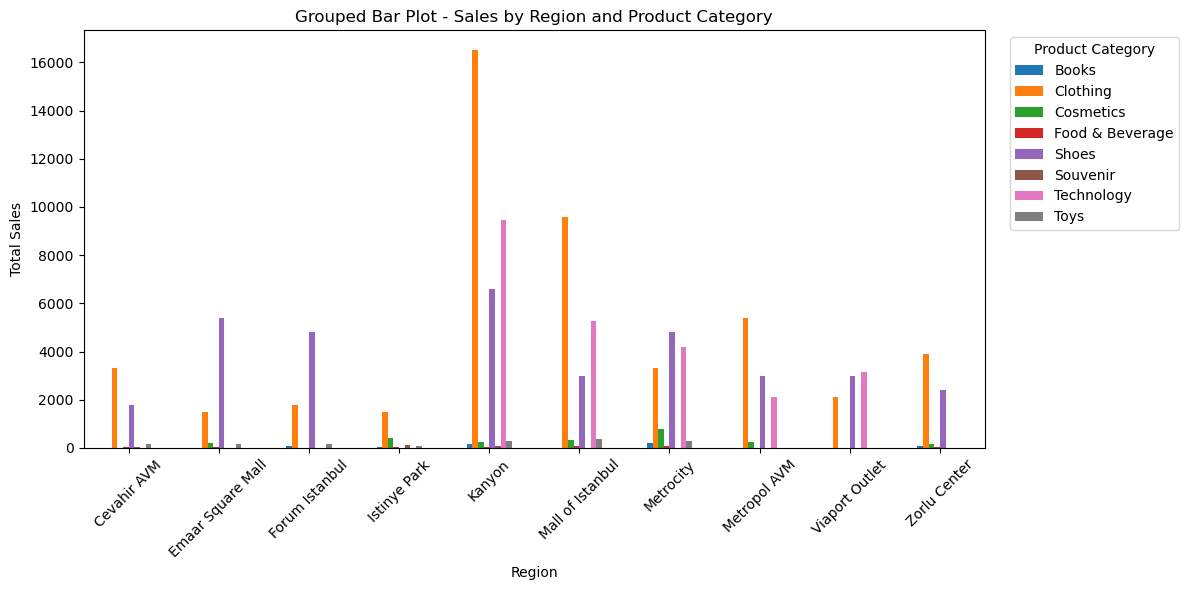

In [18]:

sales_by_region_category1 = sales_by_region_category.pivot_table(
    index='Region',
    columns='Product_category',
    values='Sales_Amount'
)

ax = sales_by_region_category1.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Stacked Bar Plot - Sales by Region and Product Category')
plt.xticks(rotation=45)
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# Step 3: Grouped bar plot (side-by-side)
ax = sales_by_region_category1.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 6)
)

plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Grouped Bar Plot - Sales by Region and Product Category')
plt.xticks(rotation=45)
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()
